<h1>importing libraries

In [ ]:
import pandas as pd
import seaborn as sns

Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

<h3> Statistics Of the Datasets

In [ ]:
dataset.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1>Exploratory Data Analysis

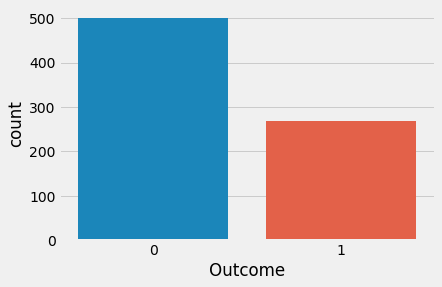

In [ ]:
plt.style.use('fivethirtyeight')
sns.countplot(x='Outcome',data=dataset)
plt.show()

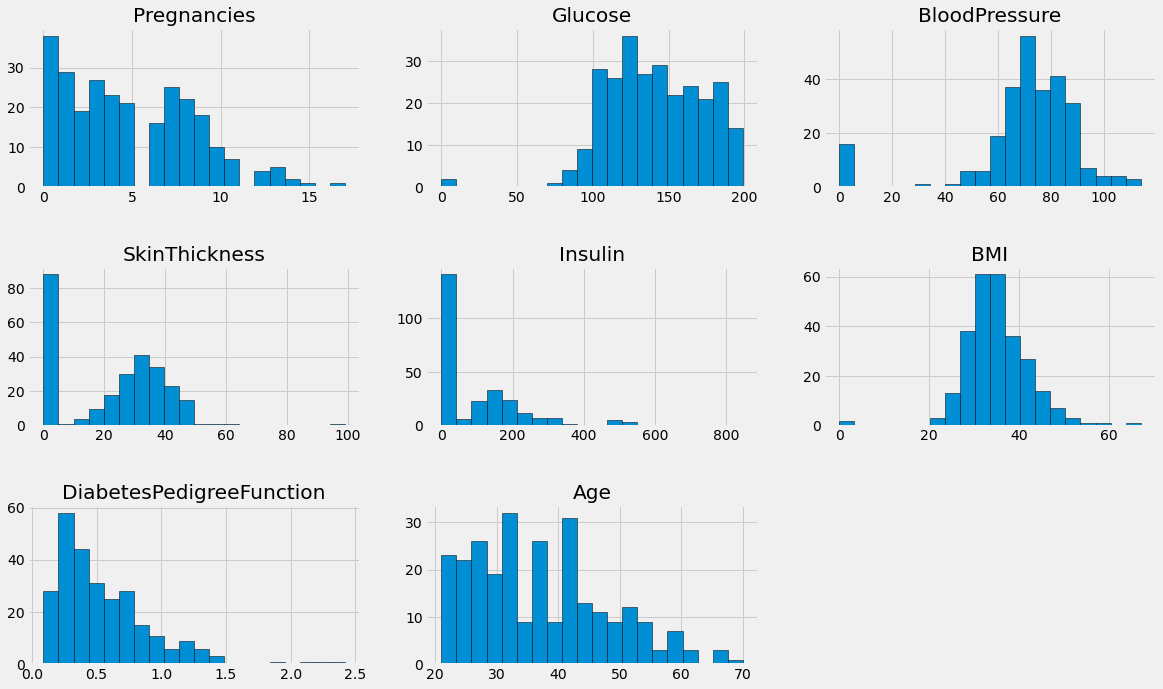

In [ ]:
import itertools
dataset1=dataset[dataset['Outcome']==1]
columns=dataset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

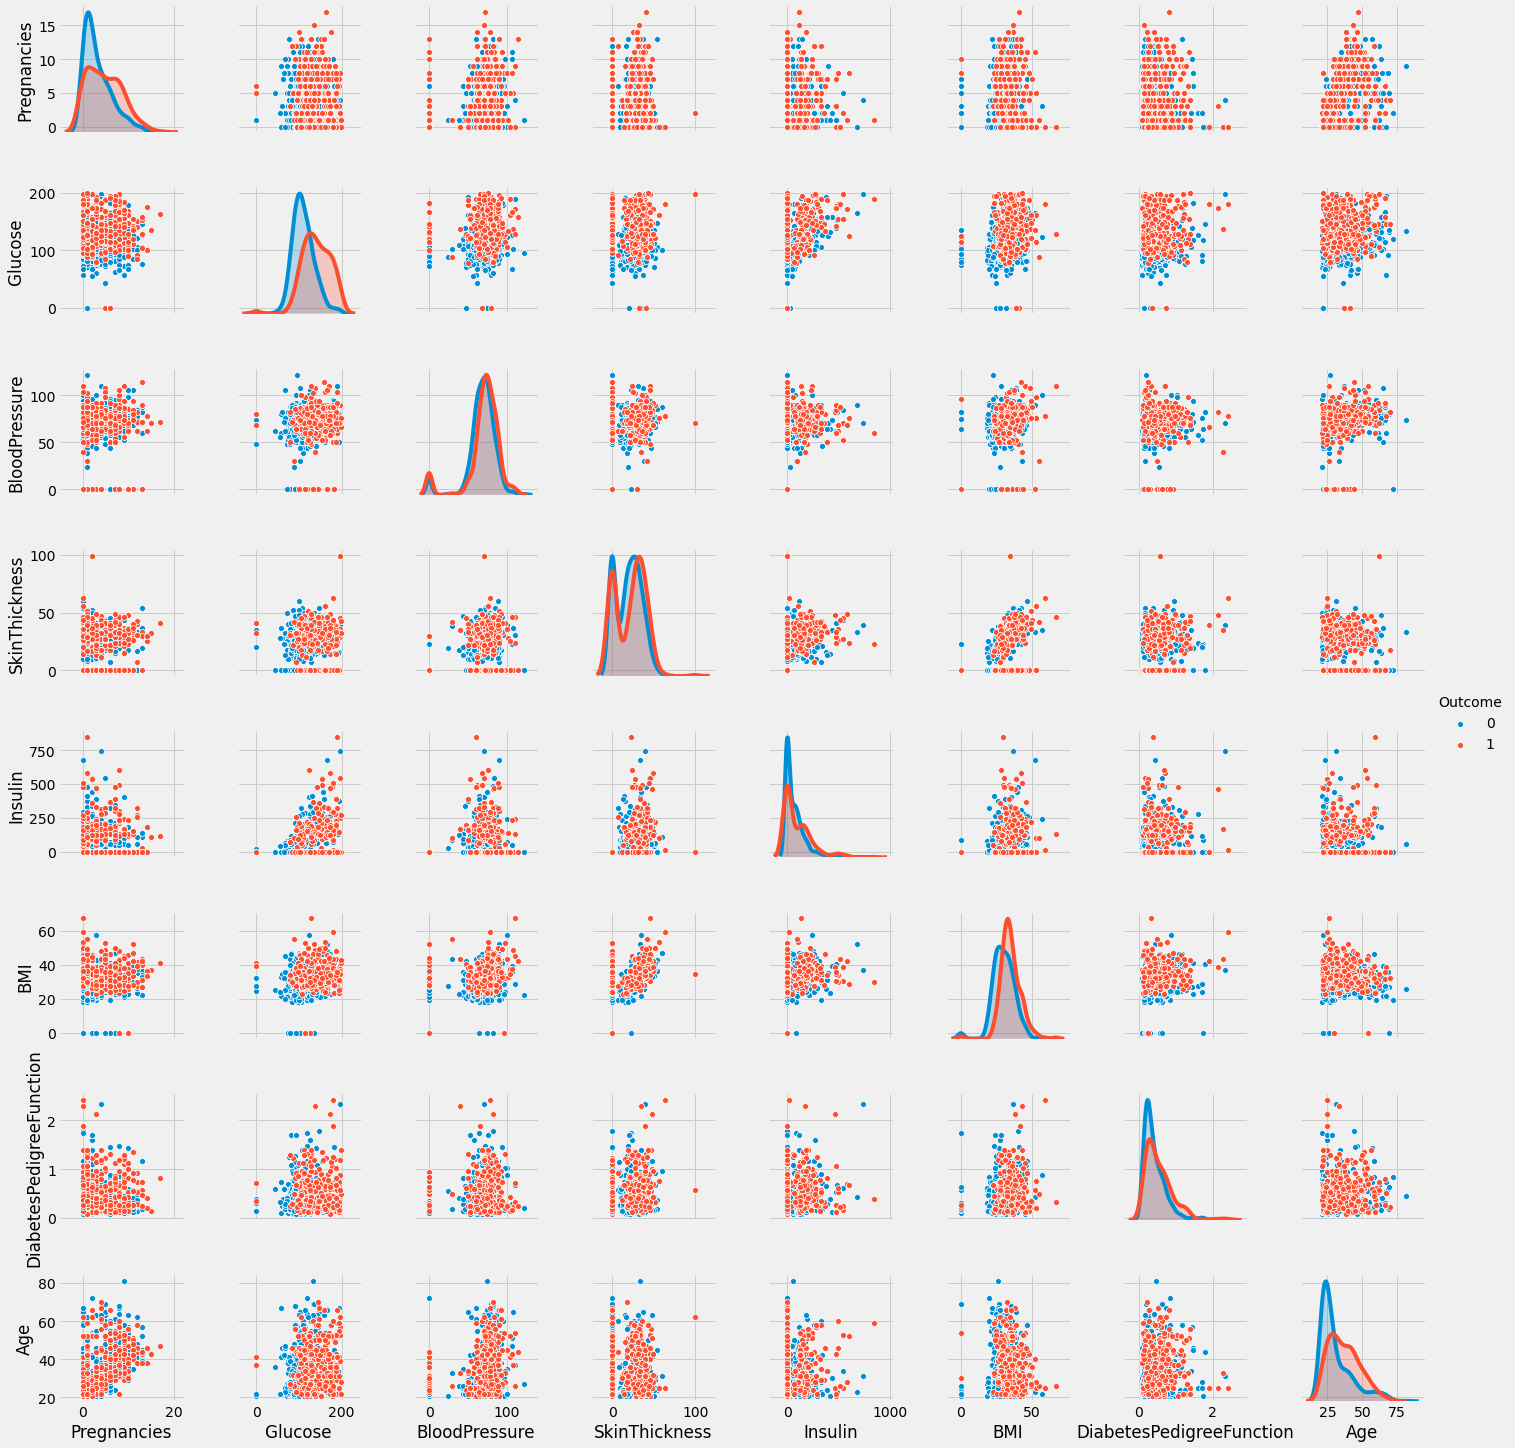

In [ ]:
sns.pairplot(data=dataset, hue='Outcome',diag_kind='kde')
plt.show()

Observations:<br>
1)The diagonal shows the distribution of the the dataset with the kernel density plots.

2)The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances

**<h1>Neural Network From Scratch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# We Have This Dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab = dataset.to_numpy()

In [ ]:
X = diab[0: , 0:dataset.shape[1]-1]
Y = diab[: , -1]
print(X[0:3] , X.shape)
print('----------------------------------------------------------')
print(Y[0:10], Y.shape)

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]] (768, 8)
----------------------------------------------------------
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.] (768,)


<h2>Splitting Dataset into Training and Test Set

In [ ]:
split = 0.8
row = int(split * len(X))
X_train = X[0:row, :]        # (614,8)
Y_train = Y[0:row]           # (614, )
X_test = X[row: , :]         # (154,8)
Y_test = Y[row:]             # (154, )

In [ ]:
def data_summary():
  print('I/P Training Data Shape: ', X_train.shape)
  print('O/P Training Data Shape: ', Y_train.shape)
  print('I/P Testing Data Shape: ', X_test.shape)
  print('O/P Testing Data Shape: ', Y_test.shape)
  print('----------------------------------------')
  print('Maximum Value in X_train ', X_train.max())
  print('Maximum Value in X_test ', X_test.max())

<h2>Normalizing  Data

In [ ]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test  = (X_test - X_test.min()) / (X_test.max() - X_test.min())

In [ ]:
data_summary()

I/P Training Data Shape:  (614, 8)
O/P Training Data Shape:  (614,)
I/P Testing Data Shape:  (154, 8)
O/P Testing Data Shape:  (154,)
----------------------------------------
Maximum Value in X_train  1.0
Maximum Value in X_test  1.0


In [ ]:
X_train[0:3]

array([[0.0070922 , 0.1749409 , 0.08510638, 0.04137116, 0.        ,
        0.03971631, 0.00074113, 0.05910165],
       [0.00118203, 0.10047281, 0.07801418, 0.03427896, 0.        ,
        0.03144208, 0.00041489, 0.03664303],
       [0.00945626, 0.21631206, 0.07565012, 0.        , 0.        ,
        0.02754137, 0.00079433, 0.03782506]])

In [ ]:
len(X_train.flatten())

4912

In [ ]:
def relu(val):
  return np.maximum(0,val)

def relu_derivative(val):
  return 1. * (val > 0)

In [ ]:
def sigmoid(x):
  return np.exp(np.fmin(x, 0)) / (1 + np.exp(-np.abs(x)))

def sigmoid_derivative(val):
  return sigmoid(val) * (1 - sigmoid(val))

In [ ]:
a = np.full((15,1), 3).flatten()
a

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
b = np.ones((15,))
b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
b -a

array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2.])

<h1>Writing Neural Network Class

In [ ]:
class NeuralNetwork:
  def __init__(self,input_size,layers,output_size):
      np.random.seed(0)
      model = {}
      model['W1'] = np.random.randn(input_size,layers[0])  
      model['b1'] = np.zeros((1,layers[0]))
      
      model['W2'] = np.random.randn(layers[0],layers[1]) 
      model['b2'] = np.zeros((1,layers[1]))
      
      model['W3'] = np.random.randn(layers[1],output_size) 
      model['b3'] = np.zeros((1,output_size))
        
      self.model = model
    
  def forward(self, x):
      W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
      b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']

      z1 = np.dot(x, W1) +  b1
      a1 = relu(z1)
      
      z2 = np.dot(a1, W2) + b2
      a2 = relu(z2)
      
      z3 = np.dot(a2, W3) + b3
      y_ = sigmoid(z3)
      
      self.activation_outputs = (a1, a2, y_)
      self.neurons_outputs = (z1, z2, z3)
      return y_
  
  def backprop(self, x, y, learning_rate):
    W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
    b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
    a1, a2, y_ = self.activation_outputs
    z1, z2, z3 = self.neurons_outputs

                # x   (614, 8) 
                # W1  (8, 5)
                # A1  (614, 5)
    # ----------------------------------------------------------
                # W2  (5, 4)
                # A2  (614, 4)
    # ----------------------------------------------------------
                # W3  (4, 1)
                # Y_  (614, 1)
    # ----------------------------------------------------------

    # Backpropagation b/w Output Layer and 2nd hidden Layer
                                              
    dL_da = y_ - y.reshape(x.shape[0], 1)
    da_dz_3 = sigmoid_derivative(a2)
    dz_dw_3 = a2
    delta3 = dL_da
    dw3 = np.dot(da_dz_3.T, delta3)          # W3.shape
    db3 = np.sum(delta3, axis = 0) / x.shape[0]           
    # ----------------------------------------------------------
    # Backpropagation b/w 2nd hidden Layer and 1st hidden Layer
    dL_dz_2 = delta3
    dz_da_2 = W3
    da_dz_2 = relu_derivative(a1)
    dz_dw_2 = a1

    delta2 = np.dot(delta3, W3.T )
    dw2 = np.dot(a1.T, delta2)              # W2.shape
    db2 = np.sum(delta2, axis = 0) / x.shape[0]
    # # ----------------------------------------------------------
    # # Backpropagation b/w 1st hidden Layer and Input Layer
    dL_dz_1 = delta2
    dz_da_1 = W2
    da_dz_1 = relu_derivative(x)
    dz_dw_1 = x

    delta1 = np.dot(delta2, W2.T)
    dw1 = np.dot(x.T, delta1)               # W1.shape
    db1 = np.sum(delta1, axis = 0) / x.shape[0]
    
    # Updating Weights
    
    
    self.model['W1'] -= learning_rate*dw1
    self.model['W2'] -= learning_rate*dw2
    self.model['W3'] -= learning_rate*dw3
    
    self.model['b1'] -= learning_rate*db1
    self.model['b2'] -= learning_rate*db2
    self.model['b3'] -= learning_rate*db3

  def summary(self):
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_ = self.activation_outputs
    z1, z2, z3 = self.neurons_outputs
    print("Z1 ",z1.shape)
    print("W1 ",W1.shape)
    print("A1 ",a1.shape)
    print('-------------------')
    print("Z2 ",z2.shape)
    print("W2 ",W2.shape)
    print("A2 ",a2.shape)
    print('-------------------')
    print("Z3 ",z3.shape)
    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)
    print('-------------------')

<h1>Model

In [ ]:
model = NeuralNetwork(X_train.shape[1], [4,4],  1)

<h2>Mean Squared Error

In [ ]:
def mean_squared(y_pred, y_orig):
  squared_array = 0
  cnt = 0
  training_loss_1 = []
  if len(y_pred) == len(y_orig):
    for i in np.arange(len(y_pred)):
      squared_array += np.square(np.subtract(y_orig[i], y_pred[i]))
      cnt+=1
      training_loss_1.append(squared_array/cnt)
    mse = squared_array/cnt
    return mse, training_loss_1
  else:
    print('Shape Of Predicted value and Original must be same')

<h1>Training

In [ ]:
def training(x, y, model, epochs, logs=True):
  training_loss = []

  for ix in range(epochs):
    Y_ = model.forward(x)
    l_oss, trained_loss = mean_squared(Y_, y) 
    # print(len(trained_loss))
    training_loss.append(l_oss)
    model.backprop(x, y, 0.002)
    
    # if logs and ix%50 == 0:
    #   print("Epoch %d Loss %.4f"%(ix, l_oss),end='\n')
      
  return training_loss, trained_loss 

In [ ]:
# np.warnings.filterwarnings('ignore', 'overflow')
loss,trained_loss  = training(X_train, Y_train, model, 1000)

In [ ]:
X_train.flatten()

array([0.0070922 , 0.1749409 , 0.08510638, ..., 0.03841608, 0.00103783,
       0.03073286])

<h2>Model Summary

In [ ]:
model.summary()

Z1  (614, 4)
W1  (8, 4)
A1  (614, 4)
-------------------
Z2  (614, 4)
W2  (4, 4)
A2  (614, 4)
-------------------
Z3  (614, 1)
W3  (4, 1)
Y_  (614, 1)
-------------------


<h1> Testing and Visualizing

<h1>**Visualizing Model**

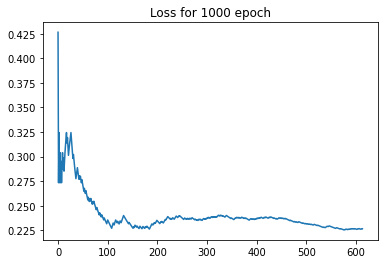

In [ ]:
plt.plot(trained_loss)
plt.title('Loss for 1000 epoch')
plt.show()

In [ ]:
# Y_ = model.forward(X_train[0:15])

# print(Y_train)

In [ ]:
# mse = mean_squared(Y_, Y_train[0:15]).astype(np.float128)
# mse

In [ ]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(Y_, Y_train[0:15])